In [1]:
import pandas as pd
import os
import glob
from datetime import datetime
import time
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, sqrt, atan2, radians
%matplotlib inline

In [2]:
path = '/Users/gta/Desktop/bike_data'
all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)
df.shape

(2538743, 16)

In [39]:
#How many trips have been recorded total during the chosen period?
df.shape

(2538743, 16)

In [3]:
df_sample = df.sample(frac=1, replace=True)

In [4]:
df_sample.shape

(2538743, 16)

In [5]:
df_sample.columns.tolist()

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'name_localizedValue0',
 'usertype',
 'birth year',
 'gender']

In [6]:
df_sample.reset_index(drop=True)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,name_localizedValue0,usertype,birth year,gender
0,2162,2018-03-18 05:38:03,2018-03-18 06:14:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,3587,Carroll St & Washington Ave,40.668674,-73.961815,32287,Annual Membership from Citi Bike App,Subscriber,1990.0,1
1,285,2018-03-05 15:42:02,2018-03-05 15:46:48,379,W 31 St & 7 Ave,40.749156,-73.991600,477,W 41 St & 8 Ave,40.756405,-73.990026,27468,FREE Bonus Month with Annual Membership,Subscriber,1978.0,1
2,416,2018-03-06 08:32:57,2018-03-06 08:39:53,528,2 Ave & E 31 St,40.742909,-73.977061,455,1 Ave & E 44 St,40.750020,-73.969053,17334,Annual Membership,Subscriber,1990.0,1
3,1436,2018-02-15 08:27:18,2018-02-15 08:51:15,508,W 46 St & 11 Ave,40.763414,-73.996674,357,E 11 St & Broadway,40.732618,-73.991580,17372,Annual Membership,Subscriber,1968.0,1
4,288,2018-03-01 23:19:09,2018-03-01 23:23:58,3060,Willoughby Ave & Tompkins Ave,40.694254,-73.946269,3064,Myrtle Ave & Lewis Ave,40.696820,-73.937569,30634,Annual Membership,Subscriber,1979.0,1
5,474,2018-01-17 09:44:24,2018-01-17 09:52:18,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3078,Broadway & Roebling St,40.709248,-73.960631,30179,Annual Membership,Subscriber,1971.0,1
6,277,2018-03-22 07:11:02,2018-03-22 07:15:39,490,8 Ave & W 33 St,40.751551,-73.993934,529,W 42 St & 8 Ave,40.757570,-73.990985,30756,Annual Membership,Subscriber,1963.0,1
7,340,2018-02-24 20:45:05,2018-02-24 20:50:46,3569,Franklin Ave & St Marks Ave,40.675832,-73.956168,437,Macon St & Nostrand Ave,40.680983,-73.950048,18763,Annual Membership from Citi Bike App,Subscriber,1984.0,1
8,200,2018-03-22 09:11:14,2018-03-22 09:14:34,465,Broadway & W 41 St,40.755136,-73.986580,484,W 44 St & 5 Ave,40.755003,-73.980144,32186,Annual Membership,Subscriber,1985.0,1
9,958,2018-01-13 12:52:43,2018-01-13 13:08:41,3474,6 Ave & Spring St,40.725256,-74.004121,326,E 11 St & 1 Ave,40.729538,-73.984267,16140,Annual Membership,Subscriber,1992.0,1


In [7]:
df_sample['hour'] = ''
df_sample['month'] = ''
df_sample['year'] = ''
df_sample['day_of_week'] = ''
df_sample['distance_miles'] = ''

In [8]:
df_sample.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,name_localizedValue0,usertype,birth year,gender,hour,month,year,day_of_week,distance_miles
1227005,2162,2018-03-18 05:38:03,2018-03-18 06:14:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,3587,Carroll St & Washington Ave,40.668674,...,32287,Annual Membership from Citi Bike App,Subscriber,1990.0,1,,,,,
844632,285,2018-03-05 15:42:02,2018-03-05 15:46:48,379,W 31 St & 7 Ave,40.749156,-73.991600,477,W 41 St & 8 Ave,40.756405,...,27468,FREE Bonus Month with Annual Membership,Subscriber,1978.0,1,,,,,
869266,416,2018-03-06 08:32:57,2018-03-06 08:39:53,528,2 Ave & E 31 St,40.742909,-73.977061,455,1 Ave & E 44 St,40.750020,...,17334,Annual Membership,Subscriber,1990.0,1,,,,,
2073168,1436,2018-02-15 08:27:18,2018-02-15 08:51:15,508,W 46 St & 11 Ave,40.763414,-73.996674,357,E 11 St & Broadway,40.732618,...,17372,Annual Membership,Subscriber,1968.0,1,,,,,
764490,288,2018-03-01 23:19:09,2018-03-01 23:23:58,3060,Willoughby Ave & Tompkins Ave,40.694254,-73.946269,3064,Myrtle Ave & Lewis Ave,40.696820,...,30634,Annual Membership,Subscriber,1979.0,1,,,,,


In [9]:
def distance_latlong(d):
    R = 6373
    lat1_r = radians(d['start station latitude'])
    lon1_r = radians(d['start station longitude'])
    lat2_r = radians(d['end station latitude'])
    lon2_r = radians(d['end station longitude'])
    
    dlon_r = lon2_r - lon1_r
    dlat_r = lat2_r - lat1_r
    
    a = sin(dlat_r / 2)**2 + cos(lat1_r) * cos(lat2_r) * sin(dlon_r / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c * 0.621371
    return distance

In [10]:
df_sample['distance_miles'] = df_sample.apply(distance_latlong, axis=1)
df_sample['hour'] = df_sample['starttime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)
df_sample['month'] = df_sample['starttime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)
df_sample['year'] = df_sample['starttime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year)
df_sample['day_of_week'] = df_sample['starttime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday())

In [11]:
df_sample.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,name_localizedValue0,usertype,birth year,gender,hour,month,year,day_of_week,distance_miles
1227005,2162,2018-03-18 05:38:03,2018-03-18 06:14:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,3587,Carroll St & Washington Ave,40.668674,...,32287,Annual Membership from Citi Bike App,Subscriber,1990.0,1,5,3,2018,6,4.272481
844632,285,2018-03-05 15:42:02,2018-03-05 15:46:48,379,W 31 St & 7 Ave,40.749156,-73.991600,477,W 41 St & 8 Ave,40.756405,...,27468,FREE Bonus Month with Annual Membership,Subscriber,1978.0,1,15,3,2018,0,0.507778
869266,416,2018-03-06 08:32:57,2018-03-06 08:39:53,528,2 Ave & E 31 St,40.742909,-73.977061,455,1 Ave & E 44 St,40.750020,...,17334,Annual Membership,Subscriber,1990.0,1,8,3,2018,1,0.646022
2073168,1436,2018-02-15 08:27:18,2018-02-15 08:51:15,508,W 46 St & 11 Ave,40.763414,-73.996674,357,E 11 St & Broadway,40.732618,...,17372,Annual Membership,Subscriber,1968.0,1,8,2,2018,3,2.145107
764490,288,2018-03-01 23:19:09,2018-03-01 23:23:58,3060,Willoughby Ave & Tompkins Ave,40.694254,-73.946269,3064,Myrtle Ave & Lewis Ave,40.696820,...,30634,Annual Membership,Subscriber,1979.0,1,23,3,2018,3,0.489162


In [12]:
workday_df = df_sample[['day_of_week', 'tripduration']].groupby(['day_of_week'], as_index=False).count()
workday_df

,day_of_week,tripduration
0,0,397398
1,1,436547
2,2,387255
3,3,412078
4,4,354759
5,5,320420
6,6,230286


In [13]:
month_df = df_sample[['month', 'tripduration']].groupby(['month'], as_index=False).count()
month_df

,month,tripduration
0,1,717774
1,2,843381
2,3,977588


In [44]:
#By what percentage has total ridership grown?
((month_df['tripduration'][2] - month_df['tripduration'][0]) / month_df['tripduration'][0]) * 100

36.197187415537478

In [14]:
hour_df = df_sample[['hour', 'tripduration']].groupby(['hour'], as_index=False).count()
hour_df

,hour,tripduration
0,0,18101
1,1,9875
2,2,5471
3,3,3738
4,4,4126
5,5,18458
6,6,59826
7,7,126338
8,8,227939
9,9,174339


In [15]:
df_sample[['start station id', 
           'tripduration',]].groupby('start station id', 
                                                        as_index=False).count().sort_values(by='tripduration', 
                                                                                            ascending=False).head(10)

,start station id,tripduration
256,519,27394
185,435,17088
159,402,16584
238,497,16257
434,3255,16070
232,490,15144
66,285,14554
221,477,14450
259,523,13757
206,459,13303


In [16]:
df_sample[['start station id', 
           'tripduration',]].groupby('start station id', 
                                                        as_index=False).count().sort_values(by='tripduration', 
                                                                                            ascending=False).tail(10)

,start station id,tripduration
757,3650,50
580,3432,42
611,3487,14
771,3672,4
609,3485,3
292,3040,2
433,3250,1
431,3245,1
181,428,1
714,3594,1


In [17]:
df_sample[['end station id', 
           'tripduration',]].groupby('end station id', 
                                                        as_index=False).count().sort_values(by='tripduration', 
                                                                                            ascending=False).head(10)

,end station id,tripduration
256,519,27518
238,497,17716
159,402,17685
185,435,17477
437,3255,16418
232,490,15340
221,477,14769
66,285,14722
206,459,14583
259,523,14005


In [18]:
df_sample[['end station id', 
           'tripduration',]].groupby('end station id', 
                                                        as_index=False).count().sort_values(by='tripduration', 
                                                                                            ascending=False).tail(10)

,end station id,tripduration
292,3040,3
429,3240,3
778,3672,3
443,3267,2
436,3250,2
181,428,2
614,3481,2
764,3652,1
581,3428,1
417,3214,1


In [19]:
df_sample[['start station id', 'gender',]].groupby('gender', as_index=False).count()

,gender,start station id
0,0,130805
1,1,1862081
2,2,545857


In [20]:
df_sample[['start station id', 'bikeid',]].groupby('bikeid', as_index=False).count().sort_values(by='start station id', 
                                                                                            ascending=False).head(10)

,bikeid,start station id
11048,32239,610
11319,32517,609
10721,31851,601
9660,30624,589
10793,31980,581
10874,32061,578
10871,32058,577
11904,33121,575
10902,32090,573
10455,31453,566


In [21]:
df_sample['age'] = 2018 - df_sample['birth year']

In [22]:
df_sample.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,name_localizedValue0,usertype,birth year,gender,hour,month,year,day_of_week,distance_miles,age
1227005,2162,2018-03-18 05:38:03,2018-03-18 06:14:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,3587,Carroll St & Washington Ave,40.668674,...,Annual Membership from Citi Bike App,Subscriber,1990.0,1,5,3,2018,6,4.272481,28.0
844632,285,2018-03-05 15:42:02,2018-03-05 15:46:48,379,W 31 St & 7 Ave,40.749156,-73.991600,477,W 41 St & 8 Ave,40.756405,...,FREE Bonus Month with Annual Membership,Subscriber,1978.0,1,15,3,2018,0,0.507778,40.0
869266,416,2018-03-06 08:32:57,2018-03-06 08:39:53,528,2 Ave & E 31 St,40.742909,-73.977061,455,1 Ave & E 44 St,40.750020,...,Annual Membership,Subscriber,1990.0,1,8,3,2018,1,0.646022,28.0
2073168,1436,2018-02-15 08:27:18,2018-02-15 08:51:15,508,W 46 St & 11 Ave,40.763414,-73.996674,357,E 11 St & Broadway,40.732618,...,Annual Membership,Subscriber,1968.0,1,8,2,2018,3,2.145107,50.0
764490,288,2018-03-01 23:19:09,2018-03-01 23:23:58,3060,Willoughby Ave & Tompkins Ave,40.694254,-73.946269,3064,Myrtle Ave & Lewis Ave,40.696820,...,Annual Membership,Subscriber,1979.0,1,23,3,2018,3,0.489162,39.0


In [23]:
df_sample['tripduration'].describe()

count    2.538743e+06
mean     7.707625e+02
std      7.186954e+03
min      6.100000e+01
25%      3.210000e+02
50%      5.210000e+02
75%      8.740000e+02
max      4.421929e+06
Name: tripduration, dtype: float64

In [24]:
percent_cuts_duration = np.percentile(df_sample['tripduration'], [0, 25, 75, 90, 100])
percent_cuts_miles = np.percentile(df_sample['distance_miles'], [0, 25, 75, 90, 100])

In [25]:
df_sample['bin_duration'] = pd.cut(df_sample['tripduration'], percent_cuts_duration, labels=['short', 'medium', 'long', 'extralong'])
df_sample['bin_distance'] = pd.cut(df_sample['distance_miles'], percent_cuts_miles, labels=['short', 'medium', 'long', 'extralong'])

In [48]:
df_sample.to_csv('output.csv', index=False)

In [27]:
df_sample[['bin_duration', 'bikeid']].groupby('bin_duration').count()

,bikeid
bin_duration,
short,637507
medium,1266212
long,380964
extralong,253680


In [28]:
df_sample[['bin_distance', 'bikeid']].groupby('bin_distance').count()

,bikeid
bin_distance,
short,599157
medium,1269282
long,380808
extralong,253872


In [29]:
membership_list = df_sample['name_localizedValue0'].unique().tolist()

In [30]:
membership_list

['Annual Membership from Citi Bike App',
 'FREE Bonus Month with Annual Membership',
 'Annual Membership',
 '$25 Off Annual Membership',
 'Annual Membership - Save 15%',
 'Join Citi Bike for $14.95/month',
 '24 Hour',
 'NYCBS Employee',
 'NYCHA Membership (Renewal)',
 '3-Day Pass from Citi Bike App',
 'NYCHA Membership',
 'CDCU',
 'Day Pass',
 'Single Ride',
 '3 Day',
 'Motivate Employee',
 '$99 Annual Membership',
 'CDCU (renewal)',
 'JCBS Employee',
 'Annual Membership - Save $25 to Celebrate Expansion',
 'Partner',
 'Single Ride POS',
 'Annual Other',
 'NYCHA POS',
 '$50 Off Annual Membership',
 'Citi Bike 30-Day Trial Plus $25 Off!',
 '$35 Off Annual Membership',
 'Join Citi Bike for $14/month',
 'Hourly Pass',
 'JCHA Annual Membership $5/month',
 'Join Citi Bike for $12.95/month',
 '24 Hour from Citi Bike Squad',
 '$60 Partial Subsidy Annual Membership',
 '$99 Annual Membership for Zipcar members',
 'Annual Membership - 10% Off',
 'NYCHA Free 6 Months',
 'Citi Bike for Business An

In [31]:
df_sample[['name_localizedValue0', 'bikeid']].groupby('name_localizedValue0', as_index=False).count().sort_values(by='bikeid', ascending=False)

,name_localizedValue0,bikeid
11,Annual Membership,1777870
0,$25 Off Annual Membership,174032
16,Annual Membership from Citi Bike App,172301
28,Join Citi Bike for $14.95/month,135770
6,24 Hour,74059
23,FREE Bonus Month with Annual Membership,45011
34,NYCHA Membership (Renewal),40693
14,Annual Membership - Save 15%,28799
22,Day Pass,20008
33,NYCHA Membership,19578


In [32]:
df_sample['name_localizedValue0'].isnull().sum()

0

In [33]:
df_sample.shape

(2538743, 24)

In [34]:
df_sample[['usertype', 'bikeid', 'gender']].groupby(['usertype', 'gender']).count()

bikeid
usertype   gender         
Customer   0         87013
           1         15885
           2         11243
Subscriber 0         43792
           1       1846196
           2        534614

In [46]:
df_sample[['usertype', 'bikeid', 'month']].groupby(['usertype', 'month']).count()

bikeid
usertype   month        
Customer   1       21851
           2       33248
           3       59042
Subscriber 1      695923
           2      810133
           3      918546

In [35]:
df_subscriber = df_sample[df_sample['usertype'] == 'Subscriber']
df_subscriber['name_localizedValue0'].unique()

array(['Annual Membership from Citi Bike App',
       'FREE Bonus Month with Annual Membership', 'Annual Membership',
       '$25 Off Annual Membership', 'Annual Membership - Save 15%',
       'Join Citi Bike for $14.95/month', 'NYCBS Employee',
       'NYCHA Membership (Renewal)', 'NYCHA Membership', 'CDCU',
       'Motivate Employee', '$99 Annual Membership', 'CDCU (renewal)',
       'JCBS Employee',
       'Annual Membership - Save $25 to Celebrate Expansion', 'Partner',
       'Annual Other', 'NYCHA POS', '$50 Off Annual Membership',
       'Citi Bike 30-Day Trial Plus $25 Off!', '$35 Off Annual Membership',
       'Join Citi Bike for $14/month', 'JCHA Annual Membership $5/month',
       'Join Citi Bike for $12.95/month',
       '$60 Partial Subsidy Annual Membership',
       '$99 Annual Membership for Zipcar members',
       'Annual Membership - 10% Off', 'NYCHA Free 6 Months',
       'Citi Bike for Business Annual Membership', 'Two-Week Free Trial',
       'Annual Membership for 

In [36]:
df_customer = df_sample[df_sample['usertype'] == 'Customer']

In [37]:
df_customer['name_localizedValue0'].unique()

array(['24 Hour', '3-Day Pass from Citi Bike App', 'Day Pass',
       'Single Ride', '3 Day', 'Single Ride POS', 'Hourly Pass',
       '24 Hour from Citi Bike Squad',
       '24 Hour from Citi Bike Squad - $12/hour'], dtype=object)

In [12]:
import pandas as pd
import numpy as np

In [13]:
file = r'C:\Users\Grant_Aguinaldo\Desktop\output.csv'

In [14]:
df = pd.read_csv(file)

In [15]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,hour,month,year,day_of_week,distance_miles,age
count,2.538743e+06,2.538743e+06,2.538743e+06,2.538743e+06,2.538743e+06,2.538743e+06,2.538743e+06,2.538743e+06,2.420501e+06,2.538743e+06,2.538743e+06,2.538743e+06,2538743.0,2.538743e+06,2.538743e+06,2.420501e+06
mean,7.707625e+02,1.484532e+03,4.073772e+01,-7.398307e+01,1.473293e+03,4.073740e+01,-7.398334e+01,2.618125e+04,1.978371e+03,1.163487e+00,1.370945e+01,2.102340e+00,2018.0,2.698242e+00,1.021969e+00,3.962857e+01
std,7.186954e+03,1.406576e+03,3.625943e-02,1.810069e-02,1.403842e+03,3.601140e-02,1.816619e-02,6.220656e+03,1.223600e+01,4.897002e-01,4.785437e+00,8.107544e-01,0.0,1.902383e+00,8.084253e-01,1.223600e+01
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.401713e+01,7.200000e+01,4.064654e+01,-7.404105e+01,1.452900e+04,1.885000e+03,0.000000e+00,0.000000e+00,1.000000e+00,2018.0,0.000000e+00,0.000000e+00,1.600000e+01
25%,3.210000e+02,3.770000e+02,4.071901e+01,-7.399468e+01,3.690000e+02,4.071901e+01,-7.399490e+01,1.980400e+04,1.970000e+03,1.000000e+00,9.000000e+00,1.000000e+00,2018.0,1.000000e+00,4.884476e-01,3.000000e+01
50%,5.210000e+02,4.980000e+02,4.073932e+01,-7.398584e+01,4.970000e+02,4.073913e+01,-7.398658e+01,2.841500e+04,1.981000e+03,1.000000e+00,1.400000e+01,2.000000e+00,2018.0,3.000000e+00,7.917447e-01,3.700000e+01
75%,8.740000e+02,3.173000e+03,4.075669e+01,-7.397484e+01,3.172000e+03,4.075641e+01,-7.397520e+01,3.155500e+04,1.988000e+03,1.000000e+00,1.800000e+01,3.000000e+00,2018.0,4.000000e+00,1.290598e+00,4.800000e+01
max,4.421929e+06,3.674000e+03,4.550626e+01,-7.356891e+01,3.674000e+03,4.550626e+01,-7.356891e+01,3.355100e+04,2.002000e+03,2.000000e+00,2.300000e+01,3.000000e+00,2018.0,6.000000e+00,9.305772e+00,1.330000e+02


In [32]:
df.columns.tolist()

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'name_localizedValue0',
 'usertype',
 'birth year',
 'gender',
 'hour',
 'month',
 'year',
 'day_of_week',
 'distance_miles',
 'age',
 'bin_duration',
 'bin_distance',
 'bin_travel']

In [17]:
percent_cuts_miles_traveled = np.percentile(df['distance_miles'], [0, 25, 75, 90, 100])

In [20]:
df['bin_travel'] = pd.cut(df['distance_miles'], percent_cuts_miles_traveled, labels=['short', 'medium', 'long', 'extralong'])

In [24]:
df['bin_travel'].groupby(df['bin_travel']).count()

bin_travel
extralong     253872
long          380808
medium       1269282
short         599157
Name: bin_travel, dtype: int64

In [27]:
df.to_csv('output2.csv', index=False)

# Question 1
* How many trips have been recorded total during the chosen period?
* This is done by finding the total number of entries in the dataset. 

In [28]:
df.shape

(2538743, 25)

# Question 2
* By what percentage has total ridership grown?

In [31]:
df[['month', 'bikeid']].groupby(['month'], as_index=False).count()

#Create waterfall chart.

,month,bikeid
0,1,717774
1,2,843381
2,3,977588


# Question 3
* How has the proportion of short-term customers and annual subscribers changed?

In [42]:
df[['usertype', 'bikeid', 'month', 'gender']].groupby(['gender','month','usertype'], as_index=False).count()

,gender,month,usertype,bikeid
0,0,1,Customer,16883
1,0,1,Subscriber,12528
2,0,2,Customer,25497
3,0,2,Subscriber,14643
4,0,3,Customer,44633
5,0,3,Subscriber,16621
6,1,1,Customer,2876
7,1,1,Subscriber,533911
8,1,2,Customer,4720
9,1,2,Subscriber,617844


# Question 5
* Today, what are the peak hours in which bikes are used during winter months?

In [45]:
df[['hour', 'distance_miles']].groupby(['hour']).count()

,distance_miles
hour,
0,18101
1,9875
2,5471
3,3738
4,4126
5,18458
6,59826
7,126338
8,227939


# Question 6
* Today, what are the top 10 stations in the city for starting a journey? 

In [53]:
df[['start station id', 'bikeid']].groupby(['start station id'], as_index=False).count().sort_values(by='bikeid', ascending=False).head(10)

,start station id,bikeid
256,519,27394
185,435,17088
159,402,16584
238,497,16257
434,3255,16070
232,490,15144
66,285,14554
221,477,14450
259,523,13757
206,459,13303


# Question 7
* Today, what are the top 10 stations in the city for ending a journey? (Based on data, why?)

In [54]:
df[['end station id', 'bikeid']].groupby(['end station id'], as_index=False).count().sort_values(by='bikeid', ascending=False).head(10)

,end station id,bikeid
256,519,27518
238,497,17716
159,402,17685
185,435,17477
437,3255,16418
232,490,15340
221,477,14769
66,285,14722
206,459,14583
259,523,14005


# Question 8
* Today, what are the bottom 10 stations in the city for starting a journey? (Based on data, why?)

In [55]:
df[['start station id', 'bikeid']].groupby(['start station id'], as_index=False).count().sort_values(by='bikeid', ascending=False).tail(10)

,start station id,bikeid
757,3650,50
580,3432,42
611,3487,14
771,3672,4
609,3485,3
292,3040,2
433,3250,1
431,3245,1
181,428,1
714,3594,1


# Question 9
* Today, what are the bottom 10 stations in the city for ending a journey (Based on data, why?)

In [56]:
df[['end station id', 'bikeid']].groupby(['end station id'], as_index=False).count().sort_values(by='bikeid', ascending=False).tail(10)

,end station id,bikeid
292,3040,3
429,3240,3
778,3672,3
443,3267,2
436,3250,2
181,428,2
614,3481,2
764,3652,1
581,3428,1
417,3214,1


# Question 10
* Today, what is the gender breakdown of active participants (Male v. Female)?

In [60]:
df[['gender', 'distance_miles']].groupby(['gender']).count()

,distance_miles
gender,
0,130805
1,1862081
2,545857


# Question 11
* How effective has gender outreach been in increasing female ridership over the course of the past three years?

In [64]:
df_female = df[df['gender'] == 2].reset_index(drop=True)
df_female.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,hour,month,year,day_of_week,distance_miles,age,bin_duration,bin_distance,bin_travel
0,330,2018-02-28 06:20:08,2018-02-28 06:25:38,3616,Steinway St & 28 Ave,40.765625,-73.913669,3572,34 Ave & 38 St,40.756913,...,2,6,2,2018,2,0.732311,55.0,medium,medium,medium
1,1265,2018-02-02 17:46:01,2018-02-02 18:07:07,376,John St & William St,40.708621,-74.007222,335,Washington Pl & Broadway,40.729039,...,2,17,2,2018,4,1.570899,54.0,long,long,long
2,72,2018-03-26 08:22:22,2018-03-26 08:23:34,265,Stanton St & Chrystie St,40.722293,-73.991475,312,Allen St & Stanton St,40.722055,...,2,8,3,2018,0,0.124939,24.0,short,short,short
3,333,2018-02-18 18:25:47,2018-02-18 18:31:21,531,Forsyth St & Broome St,40.718939,-73.992663,502,Henry St & Grand St,40.714215,...,2,18,2,2018,6,0.676803,34.0,medium,medium,medium
4,1423,2018-02-03 11:34:57,2018-02-03 11:58:41,453,W 22 St & 8 Ave,40.744751,-73.999154,146,Hudson St & Reade St,40.716250,...,2,11,2,2018,5,2.037670,27.0,extralong,long,long


In [66]:
df_female[['month', 'bikeid']].groupby(['month'], as_index=False).count()

,month,bikeid
0,1,151576
1,2,180677
2,3,213604


# Question 12
* How does the average trip duration change by age?

In [75]:
df[['age', 'distance_miles']].groupby(['age'], as_index=False).count().sort_values(by='distance_miles', ascending=False).head(10)

,age,distance_miles
13,29.0,95086
12,28.0,94879
14,30.0,94226
17,33.0,90807
16,32.0,90044
15,31.0,89953
11,27.0,88969
18,34.0,82502
10,26.0,80661
19,35.0,77744


# Question 13
* What is the average distance in miles that a bike is ridden?

In [78]:
df['distance_miles'].mean()

1.0219686930049288

# Question 14
* Which Bikes (by ID) are most likely due for repair or inspection this year?

In [100]:
df[['distance_miles', 'bikeid']].groupby(['bikeid'])['distance_miles'].sum().head(10)

bikeid
14529    228.281250
14530    189.548891
14532    125.183818
14533    100.233149
14534    125.937174
14535     43.145771
14536    237.403417
14537    116.094638
14539    129.920854
14540    177.874555
Name: distance_miles, dtype: float64

In [102]:
df[df['bikeid'] == 14529]['distance_miles'].sum()

228.28124969998393

In [104]:
bike_list = [14529, 
14530,
14532,
14533,
14534,
14535,
14536,
14537,
14539,
14540]

In [112]:
bike_df = df.loc[df['bikeid'].isin(bike_list)].reset_index(drop=True)

In [123]:
bike_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,hour,month,year,day_of_week,distance_miles,age,bin_duration,bin_distance,bin_travel
0,218,2018-03-20 22:38:34,2018-03-20 22:42:12,173,Broadway & W 49 St,40.760683,-73.984527,477,W 41 St & 8 Ave,40.756405,...,1,22,3,2018,1,0.412662,54.0,short,short,short
1,531,2018-01-27 12:50:43,2018-01-27 12:59:35,382,University Pl & E 14 St,40.734927,-73.992005,347,Greenwich St & W Houston St,40.728846,...,1,12,1,2018,5,0.964992,45.0,medium,medium,medium
2,481,2018-03-28 15:32:34,2018-03-28 15:40:35,167,E 39 St & 3 Ave,40.748901,-73.976049,2012,E 27 St & 1 Ave,40.739445,...,0,15,3,2018,2,0.654725,NaN,medium,medium,medium
3,379,2018-03-06 09:23:13,2018-03-06 09:29:32,458,11 Ave & W 27 St,40.751396,-74.005226,405,Washington St & Gansevoort St,40.739323,...,1,9,3,2018,1,0.848065,55.0,medium,medium,medium
4,226,2018-03-18 03:57:14,2018-03-18 04:01:00,350,Clinton St & Grand St,40.715595,-73.987030,400,Pitt St & Stanton St,40.719261,...,1,3,3,2018,6,0.373904,30.0,short,short,short


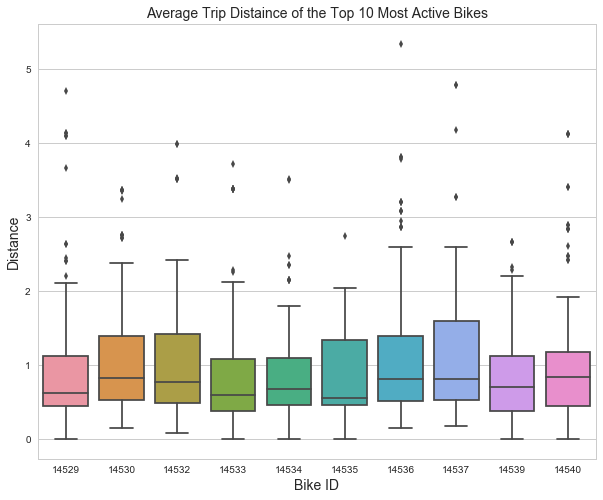

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 8))
sns.set_style("whitegrid")
ax = sns.boxplot(x="bikeid", y="distance_miles", data=bike_df)
plt.xlabel('Bike ID', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.title('Average Trip Distaince of the Top 10 Most Active Bikes', fontsize=14)